In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_munich = pd.read_csv("munich-air-quality.csv")
df_munich['date'] = pd.to_datetime(df_munich['date'])
df_munich.sort_values(by='date', ascending=False, inplace=True)
df_munich.drop(columns=[' o3', ' no2', ' so2', ' co'], inplace=True)
df_munich.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df_munich.replace(' ', np.nan, inplace=True)
df_munich['pm10'] = pd.to_numeric(df_munich['pm10'], downcast='float')
df_munich['pm25'] = pd.to_numeric(df_munich['pm25'], downcast='float')

In [18]:
df_munich.aggregate({'pm10':['min', 'max', 'mean', 'median'], 'pm25':['min', 'max', 'mean', 'median']})

,pm10,pm25
min,4.000000,6.000000
max,304.000000,110.000000
mean,21.609455,40.549999
median,19.000000,39.000000


In [30]:
df_munich.sort_values(by='pm10', ascending=False).head(10)

,date,pm25,pm10
2633,2017-01-01,NaN,304.0
1369,2020-01-01,NaN,169.0
2452,2017-01-02,NaN,140.0
2908,2016-01-01,NaN,114.0
91,2023-12-31,37.0,113.0
2473,2017-01-23,NaN,90.0
2474,2017-01-24,NaN,89.0
2479,2017-01-29,NaN,82.0
3094,2015-01-01,NaN,81.0
2472,2017-01-22,NaN,81.0


<Axes: xlabel='date'>

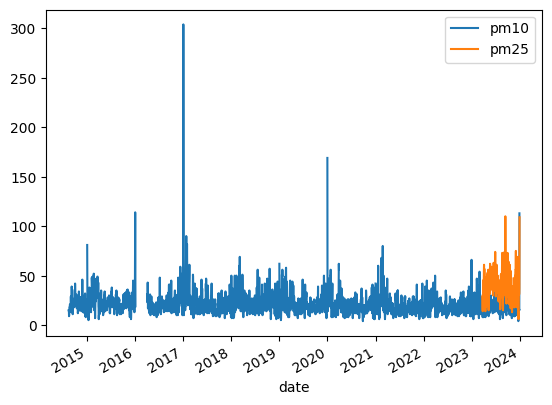

In [13]:
df_munich.plot(x='date', y=['pm10', 'pm25'], kind="line")

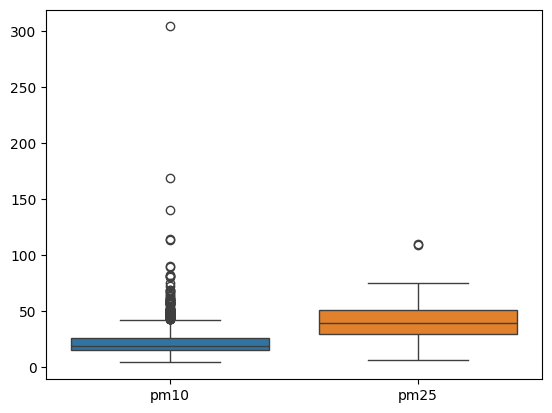

In [15]:
sns.boxplot(data=df_munich.loc[:, ['pm10', 'pm25']])
plt.show()

In [31]:
df_munich['city'] = 'munich'

In [42]:
def air_pollution_level(value):
    if value == value and value <= 50: #exclude NaN
        return "good"
    elif 51 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"

df_munich['pm10_pollution_level'] = df_munich['pm10'].map(air_pollution_level)
df_munich['pm25_pollution_level'] = df_munich['pm25'].map(air_pollution_level)

In [43]:
df_munich.loc[:,['city','date','pm10','pm10_pollution_level','pm25','pm25_pollution_level']]

,city,date,pm10,pm10_pollution_level,pm25,pm25_pollution_level
0,munich,2024-01-01,NaN,no data,109.0,unhealthy for sensitive groups
91,munich,2023-12-31,113.0,unhealthy for sensitive groups,37.0,good
90,munich,2023-12-30,15.0,good,32.0,good
89,munich,2023-12-29,16.0,good,31.0,good
88,munich,2023-12-28,15.0,good,31.0,good
...,...,...,...,...,...,...
3277,munich,2014-08-17,10.0,good,NaN,no data
3276,munich,2014-08-16,9.0,good,NaN,no data
3275,munich,2014-08-15,14.0,good,NaN,no data
3274,munich,2014-08-14,15.0,good,NaN,no data


In [44]:
df_munich['pm10_pollution_level'].value_counts()

pm10_pollution_level
good                              3269
moderate                            47
no data                              8
unhealthy for sensitive groups       3
unhealthy                            1
hazardous                            1
Name: count, dtype: int64

In [47]:
df_munich.groupby(['pm10_pollution_level']).get_group('hazardous')

,date,pm25,pm10,city,pm10_pollution_level,pm25_pollution_level
2633,2017-01-01,NaN,304.0,munich,hazardous,no data


<Axes: ylabel='pm10_pollution_level'>

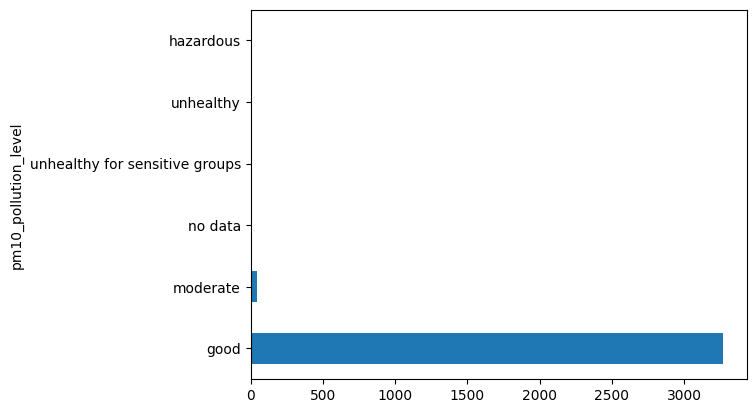

In [57]:
df_munich['pm10_pollution_level'].value_counts().plot(kind='barh')

In [62]:
df_hannover = pd.read_csv("hannover-air-quality.csv")
df_hannover['date'] = pd.to_datetime(df_hannover['date'])
df_hannover.sort_values(by='date', ascending=False, inplace=True)
df_hannover.drop(columns=[' o3', ' no2', ' co'], inplace=True)
df_hannover.rename(columns={' pm10':'pm10'}, inplace=True)
df_hannover.replace(' ', np.nan, inplace=True)
df_hannover['pm10'] = pd.to_numeric(df_hannover['pm10'], downcast='float')

In [63]:
df_hannover.aggregate({'pm10':['min', 'max', 'mean', 'median']})

,pm10
min,2.000000
max,87.000000
mean,13.491409
median,11.000000


In [64]:
df_hannover.sort_values(by='pm10', ascending=False).head(10)

,date,pm10
1481,2019-11-16,87.0
1350,2020-01-01,76.0
1926,2018-08-19,72.0
2624,2016-01-07,70.0
2623,2016-01-06,61.0
2125,2018-03-07,61.0
2981,2015-01-01,60.0
3028,2015-02-17,59.0
2297,2017-02-11,58.0
1480,2019-11-15,58.0


In [66]:
df_hannover['city'] = 'hannover'
df_hannover['pm10_pollution_level'] = df_hannover['pm10'].map(air_pollution_level)
df_hannover.loc[:,['city','date','pm10','pm10_pollution_level']]

,city,date,pm10,pm10_pollution_level
2,hannover,2024-01-03,4.0,good
1,hannover,2024-01-02,5.0,good
0,hannover,2024-01-01,7.0,good
94,hannover,2023-12-31,6.0,good
93,hannover,2023-12-30,7.0,good
...,...,...,...,...
3162,hannover,2014-08-23,13.0,good
3161,hannover,2014-08-22,12.0,good
3160,hannover,2014-08-21,12.0,good
3159,hannover,2014-08-20,7.0,good


In [67]:
df_hannover['pm10_pollution_level'].value_counts()

pm10_pollution_level
good        3181
no data       32
moderate      20
Name: count, dtype: int64

<Axes: ylabel='pm10_pollution_level'>

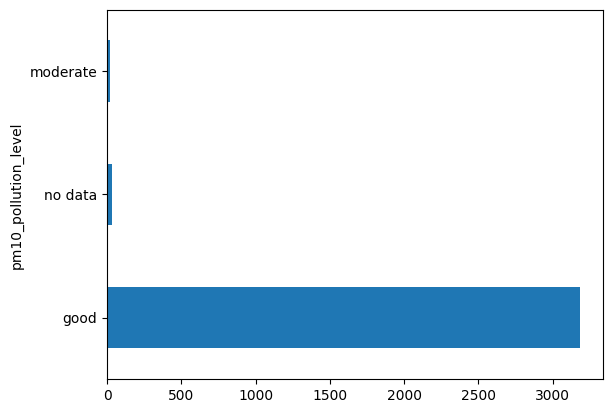

In [68]:
df_hannover['pm10_pollution_level'].value_counts().plot(kind='barh')

<Axes: xlabel='date'>

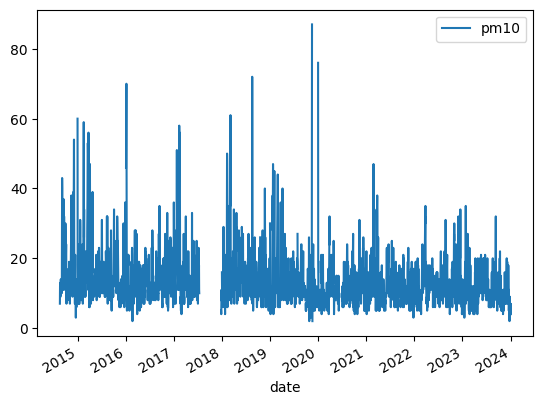

In [65]:
df_hannover.plot(x='date', y=['pm10'], kind="line")

In [70]:
df_berlin = pd.read_csv("berlin-air-quality.csv")
df_berlin['date'] = pd.to_datetime(df_berlin['date'])
df_berlin.sort_values(by='date', ascending=False, inplace=True)
df_berlin.drop(columns=[' o3', ' no2', ' co'], inplace=True)
df_berlin.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df_berlin.replace(' ', np.nan, inplace=True)
df_berlin['pm10'] = pd.to_numeric(df_berlin['pm10'], downcast='float')
df_berlin['pm25'] = pd.to_numeric(df_berlin['pm25'], downcast='float')

In [71]:
df_berlin.aggregate({'pm10':['min', 'max', 'mean', 'median'], 'pm25':['min', 'max', 'mean', 'median']})

,pm10,pm25
min,6.00000,17.000000
max,119.00000,131.000000
mean,26.19278,51.592667
median,24.00000,48.000000


In [72]:
df_berlin.sort_values(by='pm10', ascending=False).head(10)

,date,pm25,pm10
837,2021-01-21,NaN,119.0
870,2021-02-23,NaN,115.0
872,2021-02-25,NaN,113.0
94,2023-12-31,77.0,97.0
869,2021-02-22,NaN,96.0
2288,2017-02-15,NaN,95.0
871,2021-02-24,NaN,92.0
2289,2017-02-16,NaN,84.0
729,2021-04-01,NaN,77.0
1952,2018-03-08,NaN,77.0


In [73]:
df_berlin['city'] = 'berlin'
df_berlin['pm10_pollution_level'] = df_berlin['pm10'].map(air_pollution_level)
df_berlin['pm25_pollution_level'] = df_berlin['pm25'].map(air_pollution_level)
df_berlin.loc[:,['city','date','pm10','pm10_pollution_level','pm25','pm25_pollution_level']]

,city,date,pm10,pm10_pollution_level,pm25,pm25_pollution_level
2,berlin,2024-01-03,NaN,no data,22.0,good
1,berlin,2024-01-02,7.0,good,38.0,good
0,berlin,2024-01-01,11.0,good,131.0,unhealthy for sensitive groups
94,berlin,2023-12-31,97.0,moderate,77.0,moderate
93,berlin,2023-12-30,29.0,good,46.0,good
...,...,...,...,...,...,...
3147,berlin,2014-08-23,21.0,good,NaN,no data
3146,berlin,2014-08-22,38.0,good,NaN,no data
3145,berlin,2014-08-21,23.0,good,NaN,no data
3144,berlin,2014-08-20,20.0,good,NaN,no data


In [74]:
df_berlin['pm10_pollution_level'].value_counts()

pm10_pollution_level
good                              3051
moderate                           131
no data                             15
unhealthy for sensitive groups       3
Name: count, dtype: int64

<Axes: ylabel='pm10_pollution_level'>

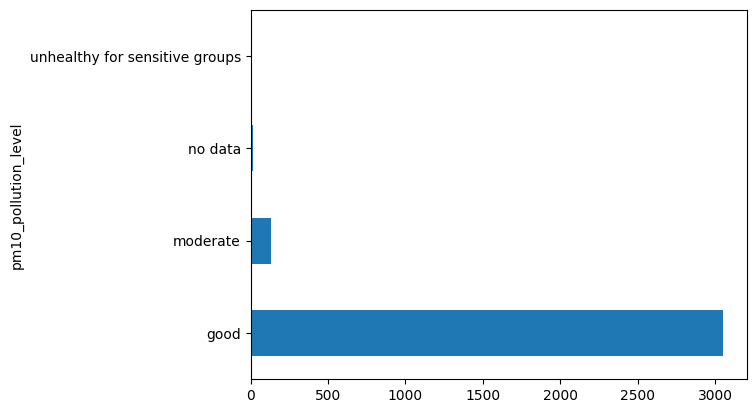

In [75]:
df_berlin['pm10_pollution_level'].value_counts().plot(kind='barh')

<Axes: xlabel='date'>

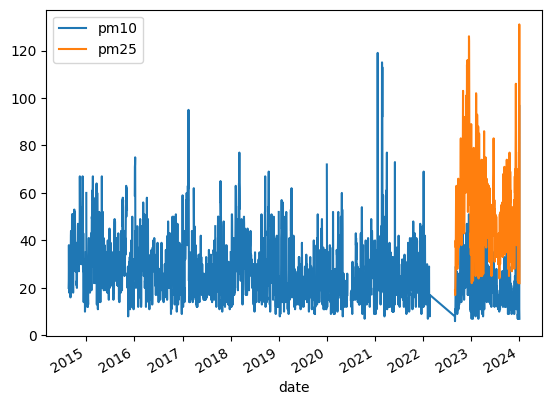

In [77]:
df_berlin.plot(x='date', y=['pm10', 'pm25'], kind="line")

In [78]:
frames = [df_munich, df_hannover, df_berlin]
df = pd.concat(frames)

In [80]:
df['city'].value_counts()

city
munich      3329
hannover    3233
berlin      3200
Name: count, dtype: int64

city
berlin      Axes(0.125,0.2;0.775x0.68)
hannover    Axes(0.125,0.2;0.775x0.68)
munich      Axes(0.125,0.2;0.775x0.68)
Name: pm10, dtype: object

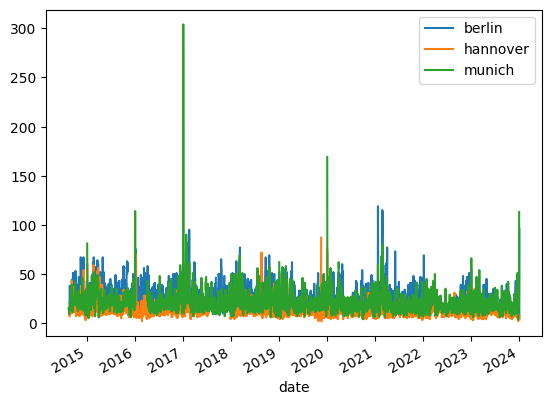

In [90]:
df_copy = df
df_copy.set_index('date', inplace=True)
df_copy.groupby('city')['pm10'].plot(legend=True)

In [101]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack(fill_value=0)

pm10_pollution_level,good,hazardous,moderate,no data,unhealthy,unhealthy for sensitive groups
city,,,,,,
berlin,3051,0,131,15,0,3
hannover,3181,0,20,32,0,0
munich,3269,1,47,8,1,3


<Axes: ylabel='city'>

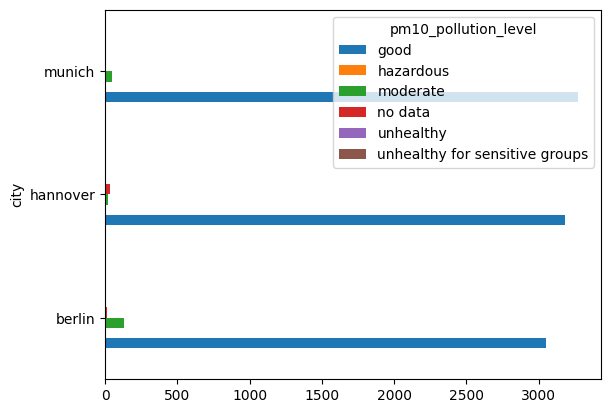

In [120]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack().plot(kind = "barh")

<Axes: xlabel='city'>

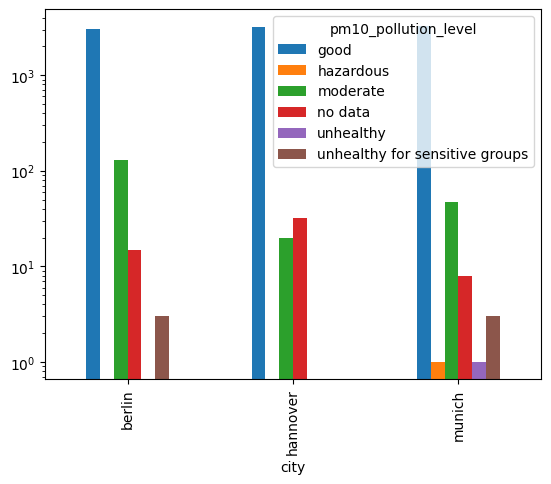

In [119]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack().plot(kind = "bar", logy=True)

<Axes: title={'center': 'pm10'}, xlabel='city'>

<Figure size 640x480 with 0 Axes>

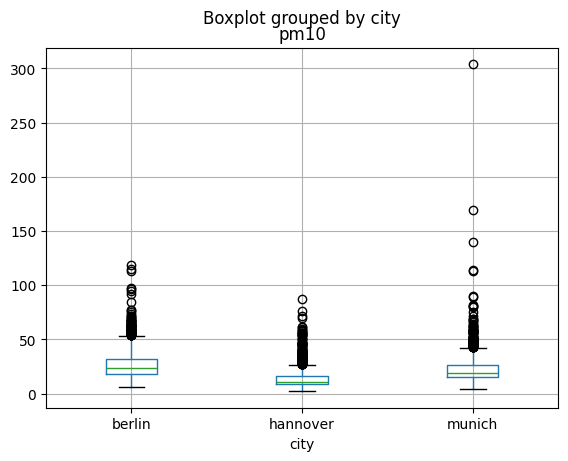

In [123]:
df_copy.boxplot(column='pm10',by='city')

array([<Axes: title={'center': 'pm10'}, xlabel='city'>,
       <Axes: title={'center': 'pm25'}, xlabel='city'>], dtype=object)

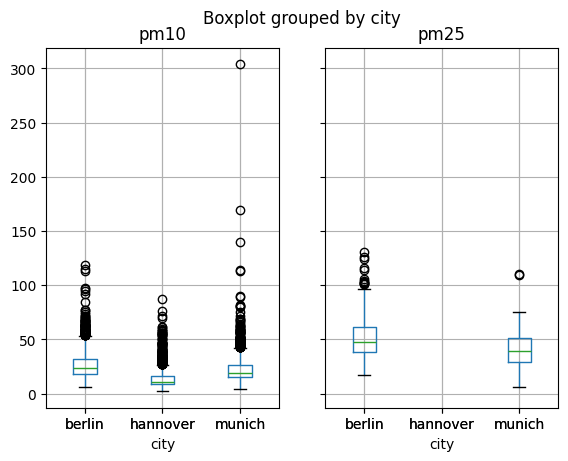

In [124]:
df_copy.boxplot(column=['pm10', 'pm25'],by='city')